### 목표
- 네이버 영화 리뷰데이터를 이용하여 긍정/부정 예측하는 모델을 만들어보자
- TF-IDF벡터라이저를 사용해보자
- konlpy 한국어 형태소 분석기를 사용해보자
- 단어별 긍정/부정 정보를 시각화하여 확인해보자

### 데이터 불러오기

In [1]:
import warnings
warnings.filterwarnings(action = 'ignore')

In [2]:
# 네이버 영화 리뷰 데이터
import pandas as pd
df_train = pd.read_csv('data/ratings_train.csv', encoding = 'utf-8')
df_train.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [3]:
df_test = pd.read_csv('data/ratings_test.csv', encoding = 'utf-8')
df_test.head()

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0


In [4]:
# 데이터 정보 
# info()
df_train.info()
# 결측치? 리뷰(document)
# 결측치가 있는 행은 모두 삭제
df_train.dropna(inplace = True)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        150000 non-null  int64 
 1   document  149995 non-null  object
 2   label     150000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.4+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 149995 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        149995 non-null  int64 
 1   document  149995 non-null  object
 2   label     149995 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.6+ MB


In [5]:
df_test.info()
# test 결측치가 있는 행 모두 삭제
df_test.dropna(inplace = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        50000 non-null  int64 
 1   document  49997 non-null  object
 2   label     50000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.1+ MB


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49997 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        49997 non-null  int64 
 1   document  49997 non-null  object
 2   label     49997 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.5+ MB


### 훈련데이터와 테스트 데이터로 분리

In [7]:
# 컬럼명 확인
df_train.columns

Index(['id', 'document', 'label'], dtype='object')

In [8]:
# train_test_split 지금 x
# 인덱싱
txt_train = df_train['document']# 훈련용 문제
y_train = df_train['label']# 훈련용 답
txt_test = df_test['document']# 테스트용 문제
y_test = df_test['label']# 테스트용 답

In [9]:
# 크기 확인
# shape
print('훈련용 문제:', txt_train.shape)
print('훈련용 답:', y_train.shape)
print('테스트용 문제:', txt_test.shape)
print('테스트용 답:', y_test.shape)

훈련용 문제: (149995,)
훈련용 답: (149995,)
테스트용 문제: (49997,)
테스트용 답: (49997,)


### Bow(bag of word)

- 문서를 토큰화&수치화하여 벡터화 기본적인 방법
- 문서 내의 모든 단어를 모아 가방을 만들고,
특정 문서의 어떤 단어가 들어있는지 숫자 형태로 나타내는 것

In [10]:
# 문서 내의 단어의 중요를 포함시킨 벡터라이저
# tfidfvectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [11]:
# tfidf 예시
test = txt_train[:3]
test

0                  아 더빙.. 진짜 짜증나네요 목소리
1    흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나
2                    너무재밓었다그래서보는것을추천한다
Name: document, dtype: object

In [12]:
# 벡터라이저 객체 생성
vect = TfidfVectorizer()
# 단어사전(가방) 구축
vect.fit(test)
# 분리된 문장으로 만든 단어 사전 출력
print(vect.vocabulary_)
# test 문장들을 수치로 변환
vect.transform(test).toarray()[0] # 1개의 문장

{'더빙': 2, '진짜': 6, '짜증나네요': 7, '목소리': 3, '포스터보고': 9, '초딩영화줄': 8, '오버연기조차': 5, '가볍지': 0, '않구나': 4, '너무재밓었다그래서보는것을추천한다': 1}


array([0. , 0. , 0.5, 0.5, 0. , 0. , 0.5, 0.5, 0. , 0. ])

In [13]:
# tfidf벡터라이저는 기본적으로 어절 단위로 문장을 끊기 때문에 한국어 특성상 
#의미를 파악하기 어려움
# 더 작은 단위인 형태소 별로 나눠서 파악을 하게 됨 -> konlpy

### 한국어 형태소 분석기
konlpy - kkma 형태소 분석기 사용, 꼬꼬마라고 불려지고 서울대학교 IDS 연구실에서 개발이 되었음

- nouns(): 명사 추출
- morphs(): 형태소 추출
- pos(): 품사 부착해서 형태소 추출

In [14]:
from konlpy.tag import Kkma

In [15]:
# 객체 생성
kkma = Kkma()

In [16]:
# 테스트용 데이터 
test = txt_train[0]
test

'아 더빙.. 진짜 짜증나네요 목소리'

In [17]:
# 명사 추출
kkma.nouns(test)

['더빙', '목소리']

In [18]:
# 함수로 토크나이저 정의
def tokenizer_nouns(txt):
    return kkma.nouns(txt)

In [19]:
# tfidf 벡터라이저에 적용해보기
# 객체 생성
test_vect = TfidfVectorizer(tokenizer = tokenizer_nouns)

# 단어 사전 구축
test_vect.fit(txt_train[:3])

# 단어 사전 출력
test_vect.vocabulary_

{'더빙': 0,
 '목소리': 2,
 '흠': 17,
 '포스터': 15,
 '포스터보고': 16,
 '보고': 4,
 '초': 12,
 '초딩영화줄': 13,
 '딩': 1,
 '영화': 6,
 '줄': 11,
 '오버': 7,
 '오버연기': 8,
 '연기': 5,
 '재': 9,
 '재밓': 10,
 '밓': 3,
 '추천': 14}

#### pos tagging 활용
형태소를 추출하여 품사태깅해주는 기능

In [20]:
# 품사 태그 종류 확인
kkma.tagset

{'EC': '연결 어미',
 'ECD': '의존적 연결 어미',
 'ECE': '대등 연결 어미',
 'ECS': '보조적 연결 어미',
 'EF': '종결 어미',
 'EFA': '청유형 종결 어미',
 'EFI': '감탄형 종결 어미',
 'EFN': '평서형 종결 어미',
 'EFO': '명령형 종결 어미',
 'EFQ': '의문형 종결 어미',
 'EFR': '존칭형 종결 어미',
 'EP': '선어말 어미',
 'EPH': '존칭 선어말 어미',
 'EPP': '공손 선어말 어미',
 'EPT': '시제 선어말 어미',
 'ET': '전성 어미',
 'ETD': '관형형 전성 어미',
 'ETN': '명사형 전성 어미',
 'IC': '감탄사',
 'JC': '접속 조사',
 'JK': '조사',
 'JKC': '보격 조사',
 'JKG': '관형격 조사',
 'JKI': '호격 조사',
 'JKM': '부사격 조사',
 'JKO': '목적격 조사',
 'JKQ': '인용격 조사',
 'JKS': '주격 조사',
 'JX': '보조사',
 'MA': '부사',
 'MAC': '접속 부사',
 'MAG': '일반 부사',
 'MD': '관형사',
 'MDN': '수 관형사',
 'MDT': '일반 관형사',
 'NN': '명사',
 'NNB': '일반 의존 명사',
 'NNG': '보통명사',
 'NNM': '단위 의존 명사',
 'NNP': '고유명사',
 'NP': '대명사',
 'NR': '수사',
 'OH': '한자',
 'OL': '외국어',
 'ON': '숫자',
 'SE': '줄임표',
 'SF': '마침표, 물음표, 느낌표',
 'SO': '붙임표(물결,숨김,빠짐)',
 'SP': '쉼표,가운뎃점,콜론,빗금',
 'SS': '따옴표,괄호표,줄표',
 'SW': '기타기호 (논리수학기호,화폐기호)',
 'UN': '명사추정범주',
 'VA': '형용사',
 'VC': '지정사',
 'VCN': "부정 지정사, 형용사 '아니다'",
 'VC

In [21]:
# 형태소별로 추출
data = "먹는다 먹다 먹었다 이쁘다 아름답다 아름다운 사진 모자"
kkma.morphs(data)

['먹',
 '는',
 '다',
 '먹',
 '다',
 '먹',
 '었',
 '다',
 '이쁘',
 '다',
 '아름답',
 '다',
 '아름답',
 'ㄴ',
 '사진',
 '모자']

In [22]:
# 형태소 추출하면서 품사 태깅
kkma.pos(data)

[('먹', 'VV'),
 ('는', 'EPT'),
 ('다', 'ECS'),
 ('먹', 'VV'),
 ('다', 'ECS'),
 ('먹', 'VV'),
 ('었', 'EPT'),
 ('다', 'EFN'),
 ('이쁘', 'VA'),
 ('다', 'ECS'),
 ('아름답', 'VA'),
 ('다', 'ECS'),
 ('아름답', 'VA'),
 ('ㄴ', 'ETD'),
 ('사진', 'NNG'),
 ('모자', 'NNG')]

In [23]:
d = pd.DataFrame(kkma.pos(data), columns = ['morphs','tag'])
d.set_index('tag', inplace = True)
d

# 감성분석 ! 동사, 형용사, 보통명사
d.loc[['VV','VA','NNG']] # 토큰나이저 함수 생성해보기

,morphs
tag,
VV,먹
VV,먹
VV,먹
VA,이쁘
VA,아름답
VA,아름답
NNG,사진
NNG,모자


In [24]:
def tokenizer2(txt):
    d = pd.DataFrame(kkma.pos(txt), columns = ['morphs','tag'])
    d.set_index('tag', inplace = True)
    # vv, va, nng 값이 있으면 인덱싱하여 return
    if ('VV' in d.index) | ('VA' in d.index) | ('NNG' in d.index):
        return d.loc[d.index.intersection(['VV','VA','NNG']),'morphs'].values
    # vv, va, nng가 없다면 []
    else:
        return []

In [25]:
# tfidf 객체 생성하여 tokenizer2 연결해보기
test_vect2 = TfidfVectorizer(tokenizer = tokenizer2)

# 단어 사전 구축
test_vect2.fit(txt_train[:3])

# 단어 사전 확인
test_vect2.vocabulary_

{'아': 5,
 '짜증나': 12,
 '더빙': 1,
 '목소리': 2,
 '흠': 15,
 '포스터': 14,
 '보고': 4,
 '영화': 8,
 '줄': 11,
 '오버': 9,
 '연기': 7,
 '가볍': 0,
 '재': 10,
 '추천': 13,
 '어': 6,
 '보': 3}

- txt_train 전체 데이터를 실제로 적용
- 10000건의 리뷰만 활용해볼 예정

In [26]:
final_tfidf_vect = TfidfVectorizer(tokenizer = tokenizer2)
final_tfidf_vect.fit(txt_train[:10000])

TfidfVectorizer(tokenizer=<function tokenizer2 at 0x0000024A9ED6D798>)

In [27]:
#단어 사전 크기 확인
print(len(final_tfidf_vect.vocabulary_))
# 단어 출력
print(final_tfidf_vect.vocabulary_)

8748
{'아': 4671, '짜증나': 7146, '더빙': 1742, '목소리': 2611, '흠': 8699, '포스터': 8014, '보고': 3208, '영화': 5271, '줄': 6884, '오버': 5359, '연기': 5172, '가볍': 55, '재': 6338, '추천': 7428, '어': 4938, '보': 3205, '교도소': 693, '이야기': 5907, '재미': 6353, '점': 6532, '조정': 6728, '멀': 2477, '없': 5041, '익살': 5974, '스파이': 4371, '더': 1730, '맨': 2450, '커스틴': 7565, '돋보이': 1829, '늙': 1489, '보이': 3238, '하': 8148, '이쁘': 5879, '걸음마': 353, '초등학교': 7354, '학년': 8209, '생인': 3875, '용': 5522, '별': 3186, '반개': 2939, '떼': 2070, '아깝': 4677, '원작': 5630, '긴장감': 1044, '살리': 3740, '욕': 5513, '이응': 5925, '경': 417, '길': 1047, '우': 5538, '생활': 3882, '발': 2969, '납': 1281, '감금': 145, '반복': 2947, '이': 5818, '드라마': 1947, '가족': 92, '사람': 3649, '모': 2550, '엿': 5233, '나오': 1205, '낫': 1284, '액션': 4881, '안': 4775, '있': 6141, '평점': 7994, '우드': 5541, '식': 4487, '화려': 8540, '낮': 1289, '헐': 8403, '길들이': 1048, '인피': 6036, '니트': 1507, '짱': 7158, '나': 1168, '죽': 6869, '때': 2042, '눈물': 1456, '향수': 8377, '자극': 6159, '허': 8380, '진호': 7090, '감성': 163, '절제':

In [28]:
# txt_train[:10000] 변환
X_train = final_tfidf_vect.transform(txt_train[:10000])
# txt_test[:10000] 변환
X_test = final_tfidf_vect.transform(txt_test[:10000])

In [29]:
X_test

<10000x8748 sparse matrix of type '<class 'numpy.float64'>'
	with 66344 stored elements in Compressed Sparse Row format>

### 모델링
- 분류 모델 : logistic

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
# 모델 객체 생성
logi_model = LogisticRegression()

In [32]:
# 모델 학습
logi_model.fit(X_train,y_train[:10000])

LogisticRegression()

In [33]:
# 모델 평가
logi_model.score(X_test, y_test[:10000])

0.7843

- 활용

In [34]:
target_names = ['부정','긍정']
reviews = ['오랜만에 볼만한 한국영화였어요 !']
tf_review = final_tfidf_vect.transform(reviews)
pre = logi_model.predict(tf_review)
pre

array([1], dtype=int64)

In [35]:
# 출력문 작성
# \' 이스케이프 코드 : '를 문자열로 그대로 출력
print(f'\'{reviews[0]}\'는 {logi_model.predict_proba(tf_review).max()*100:.2f}%로 {target_names[pre[0]]}리뷰입니다.')

'오랜만에 볼만한 한국영화였어요 !'는 81.49%로 긍정리뷰입니다.


#### 단어별 긍정/부정 정보 확인해보기

In [36]:
voc = pd.DataFrame(final_tfidf_vect.vocabulary_.keys(),
                  index = final_tfidf_vect.vocabulary_.values())
voc

,0
4671,아
7146,짜증나
1742,더빙
2611,목소리
8699,흠
...,...
6341,재개봉
4039,세가지
4858,애가
2848,민영


In [37]:
# logi_model 가중치값 연결해서 확인
learning_rate = pd.DataFrame(logi_model.coef_.T, 
                            index = voc.sort_index()[0],
                            columns = ['w'])
learning_rate.sort_values(by = 'w')

,w
0,
재미없,-4.478074
최악,-4.288826
아깝,-4.098801
쓰레기,-4.057784
실망,-3.632922
...,...
수작,3.304806
좋,3.326942
재미있,3.726432


### 추가) 네이버 영화리뷰 데이터 활용 Textming 감성 분석 실습
kkma 이외에 다른 형태소 분석기를 활용

* Hannanum: 한나눔. KAIST Semantic Web Research Center 개발.
  * http://semanticweb.kaist.ac.kr/hannanum/
* Kkma: 꼬꼬마. 서울대학교 IDS(Intelligent Data Systems) 연구실 개발.
  * http://kkma.snu.ac.kr/
* Komoran: 코모란. Shineware에서 개발.
  * https://github.com/shin285/KOMORAN
* Mecab: 메카브. 일본어용 형태소 분석기를 한국어를 사용할 수 있도록 수정.
  * https://bitbucket.org/eunjeon/mecab-ko
* Open Korean Text: 오픈 소스 한국어 분석기. 과거 트위터 형태소 분석기.
  * https://github.com/open-korean-text/open-korean-text

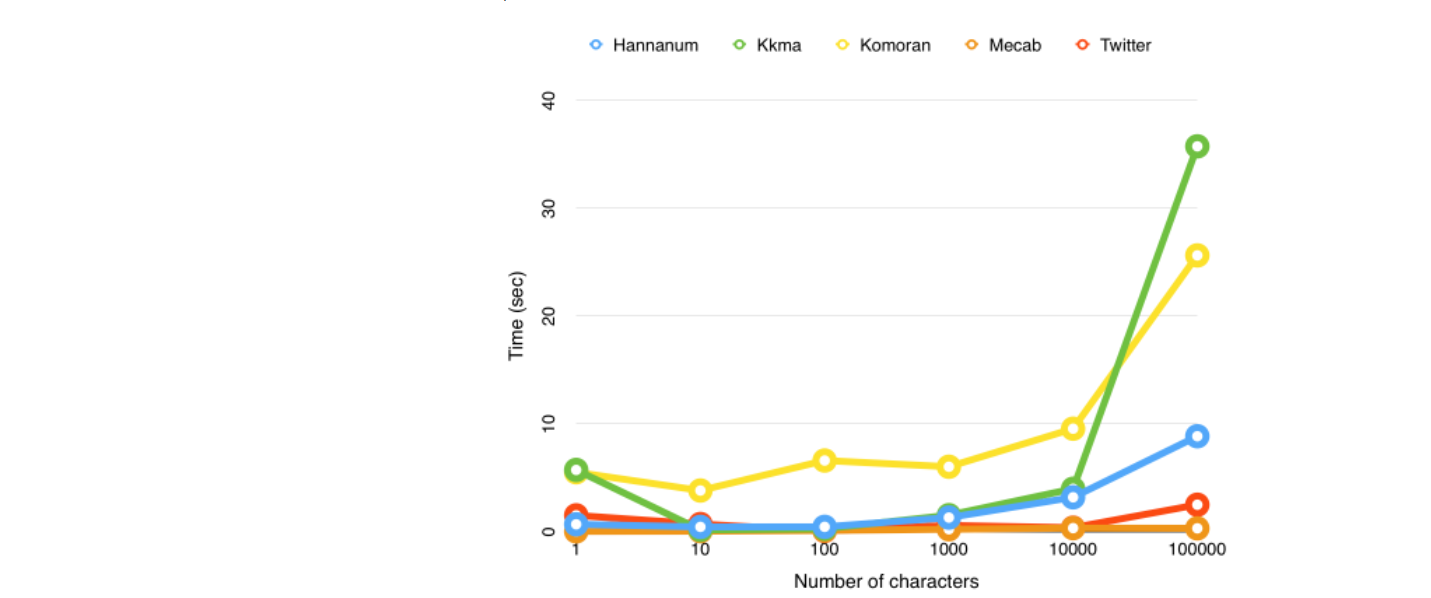
사진 출처 :KoNLPy 공식사이트
https://konlpy.org/ko/latest/morph/#comparison-between-pos-tagging-classes 


In [38]:
!pip install PyKomoran

In [39]:
#모듈 (형태소분석기) 불러오기
from konlpy.tag import Kkma, Hannanum, Okt
from PyKomoran import Komoran, DEFAULT_MODEL
# from konlpy.tag import Komoran으로 실행시 에러가 발생, PyKomoran설치하여 진행
# Mecab window환경 x 

okt=Okt() 
kkma=Kkma()  
hannanum = Hannanum()
komoran = Komoran(DEFAULT_MODEL['FULL'])

다음과 같은 메서드를 공통적으로 가지고 있음

nouns : 명사 추출  
morphs : 형태소 추출  
pos : 품사 부착  

In [42]:
txt = txt_train[2]

print(kkma.nouns(txt)) #kkma
print(hannanum.nouns(txt)) #hannanum
print(komoran.nouns(txt)) #komoran
print(okt.nouns(txt)) #okt

['재', '재밓', '밓', '추천']
['너무재밓었다그래서보는것을추천한다']
['재미', '추천']
['무재', '밓었', '다그', '래서', '추천']


In [44]:
txt = txt_train[2]

print(kkma.pos(txt)) #kkma
print(hannanum.pos(txt)) #hannanum
print(komoran.pos(txt)) #komoran
print(okt.pos(txt)) #okt

[('너무', 'MAG'), ('재', 'NNG'), ('밓', 'UN'), ('어', 'VV'), ('었', 'EPT'), ('다', 'EFN'), ('그래서', 'MAC'), ('보', 'VV'), ('는', 'ETD'), ('것', 'NNB'), ('을', 'JKO'), ('추천', 'NNG'), ('하', 'XSV'), ('ㄴ다', 'EFN')]
[('너무재밓었다그래서보는것을추천한다', 'N')]
[너무/MAG(0,2), 재미/NNG(2,4), ㅎ/XSV(3,4), 었/EP(4,5), 다/EC(5,6), 그러/VV(6,9), 어서/EC(6,9), 보/VX(9,10), 는/ETM(10,11), 것/NNB(11,12), 을/JKO(12,13), 추천/NNG(13,15), 하/XSV(15,16), ㄴ다/EC(15,17)]
[('너', 'Modifier'), ('무재', 'Noun'), ('밓었', 'Noun'), ('다그', 'Noun'), ('래서', 'Noun'), ('보는것을', 'Verb'), ('추천', 'Noun'), ('한', 'Josa'), ('다', 'Adverb')]


In [49]:
# 소요 시간 확인해보기
import time
def  time_use(a,txt):
    start = time.time()
    for i in  range(0, len(txt)): #문서의 형태, 크기에 따라서 다르게 설정하기
        nouns=a.nouns(txt[i])
    end = time.time()
    total_time=(f"{end - start:.4f} sec")
    print('{0} ==> {1}'.format(a ,total_time))
time_use(kkma,txt_train[:10])
time_use(komoran,txt_train[:10])
time_use(hannanum,txt_train[:10])
time_use(okt,txt_train[:10])

<konlpy.tag._kkma.Kkma object at 0x0000024AB76634C8> ==> 0.24674 sec
<PyKomoran.core.Komoran object at 0x0000024A9EE5BF88> ==> 0.03538 sec
<konlpy.tag._hannanum.Hannanum object at 0x0000024A94E4E648> ==> 0.03790 sec
<konlpy.tag._okt.Okt object at 0x0000024AB7709988> ==> 0.09076 sec
